## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
df=pd.read_csv('D:/Project/weatherhistory.csv')
print('Dataset loaded Successfully')

Dataset loaded Successfully


## Read Datasets

In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
df.shape

(96453, 12)

In [8]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [12]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [13]:
df = df.drop(['Daily Summary','Wind Bearing (degrees)','Summary','Precip Type','Temperature (C)',
              'Wind Speed (km/h)','Visibility (km)','Pressure (millibars)'], axis = 1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity,Loud Cover
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,0.0
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,0.0
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,0.0
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,0.0
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,0.0


In [15]:
df.shape

(96453, 4)

In [16]:
#to_datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

In [17]:
#set index
df = df.set_index('Formatted Date')

In [18]:
data = df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
2006-05-01 00:00:00+00:00,15.539479,0.721801
2006-06-01 00:00:00+00:00,19.535965,0.747125
2006-07-01 00:00:00+00:00,23.595348,0.656304
2006-08-01 00:00:00+00:00,19.528241,0.760753


## January

Text(0.5,1,'January')

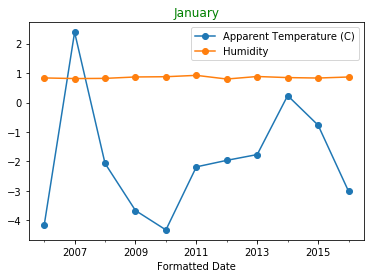

In [19]:
Jan = data[data.index.month==1]
Jan.plot(marker='o')
plt.title('January',color='green')

## Feburary

Text(0.5,1,'February')

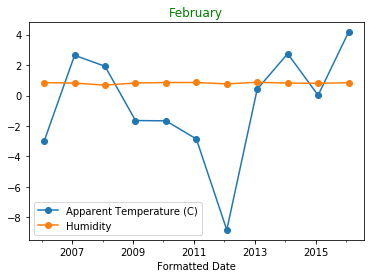

In [20]:
feb = data[data.index.month==2]
feb.plot(marker='o')
plt.title('February',color='green')

## March

Text(0.5,1,'March')

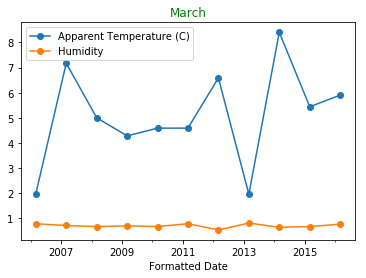

In [22]:
mar = data[data.index.month==3]
mar.plot(marker='o')
plt.title('March',color='green')

## April

Text(0.5,1,'April')

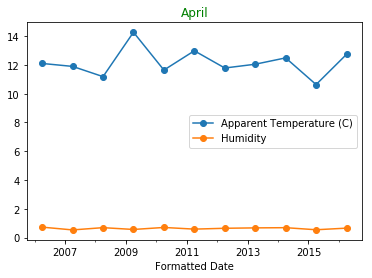

In [23]:
Apr = data[data.index.month==4]
Apr.plot(marker='o')
plt.title('April',color='green')

## May

Text(0.5,1,'May')

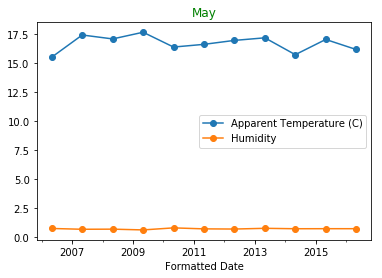

In [24]:
May = data[data.index.month==5]
May.plot(marker='o')
plt.title('May',color='green')

## June

Text(0.5,1,'June')

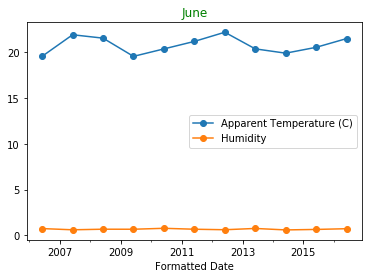

In [25]:
June = data[data.index.month==6]
June.plot(marker='o')
plt.title('June',color='green')

## July

Text(0.5,1,'July')

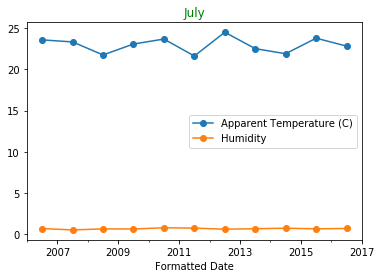

In [26]:
July = data[data.index.month==7]
July.plot(marker='o')
plt.title('July',color='green')

## August

Text(0.5,1,'August')

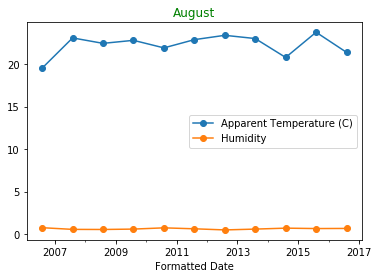

In [27]:
Aug = data[data.index.month==8]
Aug.plot(marker='o')
plt.title('August',color='green')

## September

Text(0.5,1,'September')

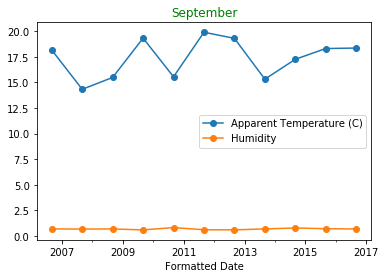

In [28]:
Sep = data[data.index.month==9]
Sep.plot(marker='o')
plt.title('September',color='green')

## October

Text(0.5,1,'October')

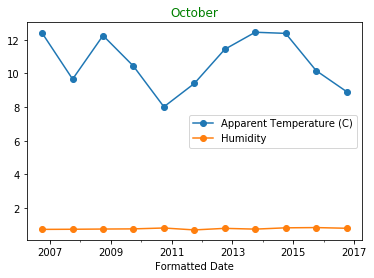

In [29]:
Oct = data[data.index.month==10]
Oct.plot(marker='o')
plt.title('October',color='green')

## November

Text(0.5,1,'November')

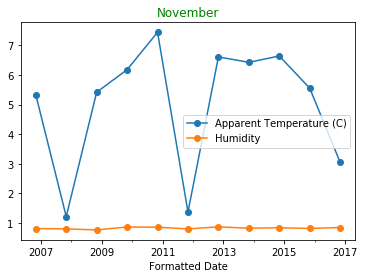

In [30]:
Nov = data[data.index.month==11]
Nov.plot(marker='o')
plt.title('November',color='green')

## December

Text(0.5,1,'December')

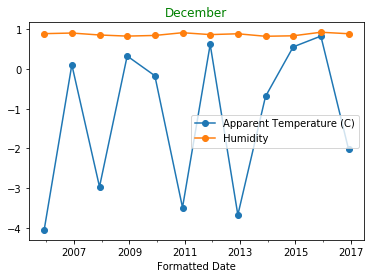

In [31]:
Dec = data[data.index.month==12]
Dec.plot(marker='o')
plt.title('December',color='green')